In [1]:
from pathlib import Path
import datetime
import algorithms
import data_clean
import simulations
import pandas as pd
import numpy as np
from pathlib import Path
from os import path

In [2]:
df = data_clean.do(data_clean)
df = algorithms.ml_probabilities(df)
df_historic_win_data = data_clean.clean_data("spreadspoke_scores.csv", "nfl_teams.csv", "1990-9-10") #winners by spread since
#win_dict = algorithms.win_percent(df_historic_win_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [3]:
# start_date, end_date = simulations.historic_win_set(2018,11,15, 2017, 9, 10)
# my_sim = simulations.Simulations(1000,0.05, -3, start_date, end_date) #spread is negative
# my_sim.simulate_v2(df_historic_win_data,df,algorithms)
# 
# 

In [4]:
# x = my_sim.current_amount

KeyboardInterrupt: 

In [7]:
start = 1000
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
for year in year:
    start_date, end_date = simulations.historic_win_set(year +1 ,11,15, year, 9, 10)
    min_ev = [.07]

    # max_spread = []
    # for i in [x * 0.5 for x in range(6, 38)]:
    #     max_spread.append(-i)
    max_spread = [-15]    
    df_results = pd.DataFrame()
    for ev in min_ev:
        for spread in max_spread:
            #for ep in epsilon:
                my_sim = simulations.Simulations(1000,ev, spread, start_date, end_date) #spread is negative
                my_sim.simulate_v2(df_historic_win_data,df,algorithms)
                results = df_results.append({'Amount' : round(my_sim.current_amount,2),'Amount_EV' : round(my_sim.current_ev,2), 'Max_Spread': spread,
                                                             'EV' : ev, 'Bet_Count': my_sim.bet, 'Year': year}, ignore_index=True)
                df_results.append(results)

                write_df = results
                my_file = Path('test_v15.csv')
                # my_file = Path(str(year) + "_" + str(year + 1) + ".csv") #file name
                if my_file.is_file():
                    with open(my_file, 'a') as f:
                        write_df.to_csv(f, header=False, index=False)
                else:
                    with open(my_file, 'a') as f:
                        write_df.to_csv(f, header=True, index=False)

In [8]:
df_results = df_results.sort_values(by="Amount", ascending=False)

In [9]:
df_results.head(50)


""


In [7]:
test = pd.read_csv('test_v12.csv')
test

,Amount,EV,Max_Spread,Start,Year
0,1019.13,0.07,-15.0,1000.0,2009.0
1,1016.44,0.10,-15.0,1000.0,2009.0
2,966.30,0.07,-15.0,1000.0,2010.0
3,975.09,0.10,-15.0,1000.0,2010.0
4,989.08,0.07,-15.0,1000.0,2011.0
5,1013.02,0.10,-15.0,1000.0,2011.0
6,1020.95,0.07,-15.0,1000.0,2012.0
7,1025.60,0.10,-15.0,1000.0,2012.0
8,1017.99,0.07,-15.0,1000.0,2013.0
9,994.14,0.10,-15.0,1000.0,2013.0


In [8]:
min_ev = [0.07,.1]
max_spread = [-15]    

for ev in min_ev:
    for max in max_spread:
        test1 = test[(test['EV'] == ev) & (test['Max_Spread'] == max)]
        print(ev, max, test1['Amount'].sum())

0.07 -15 11937.6
0.1 -15 11896.300000000001


In [34]:
import pandas as pd

chart = pd.read_csv('test_v13.csv')

In [35]:
chart['Year'] = chart['Year'].apply(lambda x: int(x))
chart.head()

,Amount,Amount_EV,Bet_Count,EV,Max_Spread,Year
0,982.56,1059.45,49.0,0.07,-15.0,2010
1,902.30,1257.01,159.0,0.07,-15.0,2011
2,945.20,1350.25,202.0,0.07,-15.0,2012
3,986.66,1338.03,199.0,0.07,-15.0,2013
4,913.12,1277.44,170.0,0.07,-15.0,2014


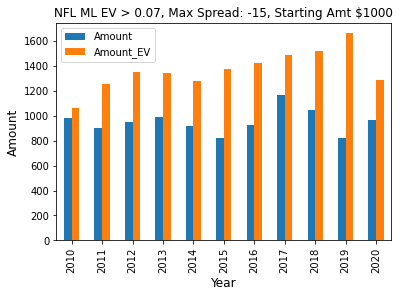

In [40]:
import matplotlib.pyplot as plt
ax = chart.plot.bar(x='Year', y=['Amount', 'Amount_EV'])
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Amount", fontsize=12)
plt.title("NFL ML EV > 0.07, Max Spread: -15, Starting Amt $1000")
plt.show()